# Modelo diferenciador de imágenes de piel sana vs. piel con cáncer

## Origen de los datos

---
* Para el modelo de piel sana o piel con lesión, hemos hecho una combinación de dos conjuntos de imágenes: uno que contenía imagenes de pieles con cancer y otro que contenía imágenes de pieles sanas. Los dos han sido obtenidos de Kaggle:

  * Imágenes del dataset piel sana: https://www.kaggle.com/datasets/thanatw/isic2019-modded

  * Imágenes del dataset piel con cáncer: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-imagesges

## Instalación de recursos e importación de librerías

---

* Realizamos todas las instalaciones necesarias para la elaboración de nuestros modelos.

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


* Importacion de librerías

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import itertools
import zipfile
import scipy
import os
import torchvision.transforms as transforms

from PIL import Image
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten, Dense, Dropout

from keras.optimizers import Adam
from keras.models import Sequential
from keras.applications import VGG19
from keras.utils import to_categorical
from keras.applications import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten, Dense

## Extracción de los datos

---

* Procedemos a la extraccíón de los datos:

  * Especificamos la ruta del origen de los datos y la ruta del destino donde los datos son extraidos y descomprimidos.
  * Listamos las carpetas extraidas y las imprimimos.
  * Creamos la variable `train_dir` que contiene las carpetas con las imágenes correspondientes a las dos clases principales con las que vamos a trabajar nuestros modelos: `piel_sana` y `piel_cancer`.


In [11]:
# Ruta del archivo ZIP local
ruta_archivo_zip = 'C:/Users/admin2/Desktop/dermascan_colabs/zips/sana_vs_cancer.zip'

# Ruta donde deseas extraer los archivos
ruta_destino = 'C:/Users/admin2/Desktop/dermascan_colabs/unzips/'

# Descomprime el contenido del ZIP
with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_destino)

# Lista los archivos extraídos
archivos_extraidos = os.listdir(ruta_destino)
print(f'Archivos extraídos: {archivos_extraidos}')

# Ruta de la carpeta que contiene las imágenes
train_dir = os.path.join(ruta_destino, 'sana_vs_cancer')

# Verifica la existencia de la carpeta antes de listar los archivos
if os.path.exists(train_dir):
    archivos_en_carpeta = os.listdir(train_dir)
    print(f'Archivos en la carpeta: {archivos_en_carpeta}')
else:
    print(f'La carpeta {train_dir} no existe.')

# Lista de nombres de archivos en la carpeta
sana_cancer = os.listdir(train_dir)

Archivos extraídos: ['objeto_o_piel', 'sana_vs_cancer']
Archivos en la carpeta: ['piel_cancer', 'piel_sana']


## Muestreo y Visualización de los datos

---

### Contenido del dataset

In [12]:
# Numero de imagenes para cada clase
nums_train = {}
nums_val = {}
for s in sana_cancer:
    nums_train[s] = len(os.listdir(train_dir + '/' + s))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


no. of images
piel_cancer            844
piel_sana              841

### Distribución de los datos

* Creamos una grásfica de barras para representar la distribución de las imágenes del dataset ssegún su clase.

<Axes: title={'center': 'Dsitribución de las imágenes'}, xlabel='Tipo de imagen', ylabel='Número de imágenes'>

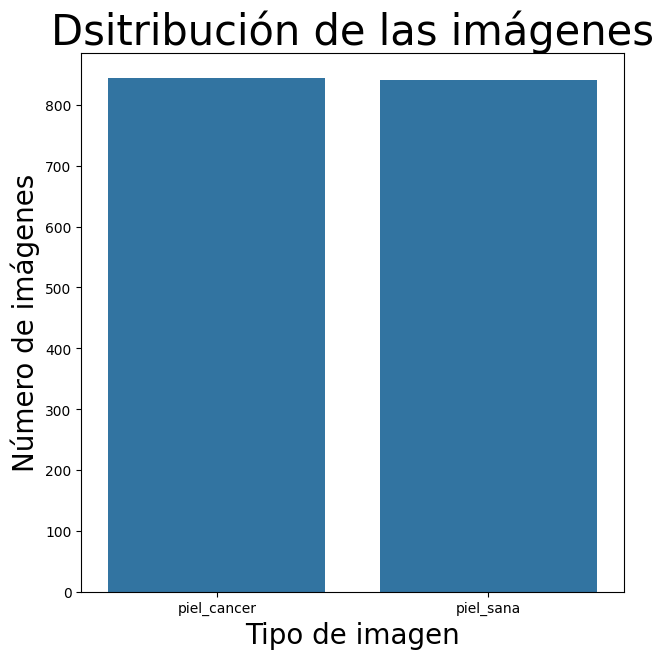

In [16]:
plt.figure(figsize=(7,7))
plt.title('Dsitribución de las imágenes',fontsize=30)
plt.ylabel('Número de imágenes',fontsize=20)
plt.xlabel('Tipo de imagen',fontsize=20)

keys = list(nums_train.keys())
vals = list(nums_train.values())
sns.barplot(x=keys, y=vals)

### Visualización

* Función para visualizar los datos

In [17]:
# Funcion para mostrar imagénes
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)

In [ ]:
* Muestra de imágenes de piel sana

Label :piel_sana(1)
Label :piel_sana(1)
Label :piel_sana(1)
Label :piel_sana(1)
Label :piel_sana(1)
Label :piel_sana(1)


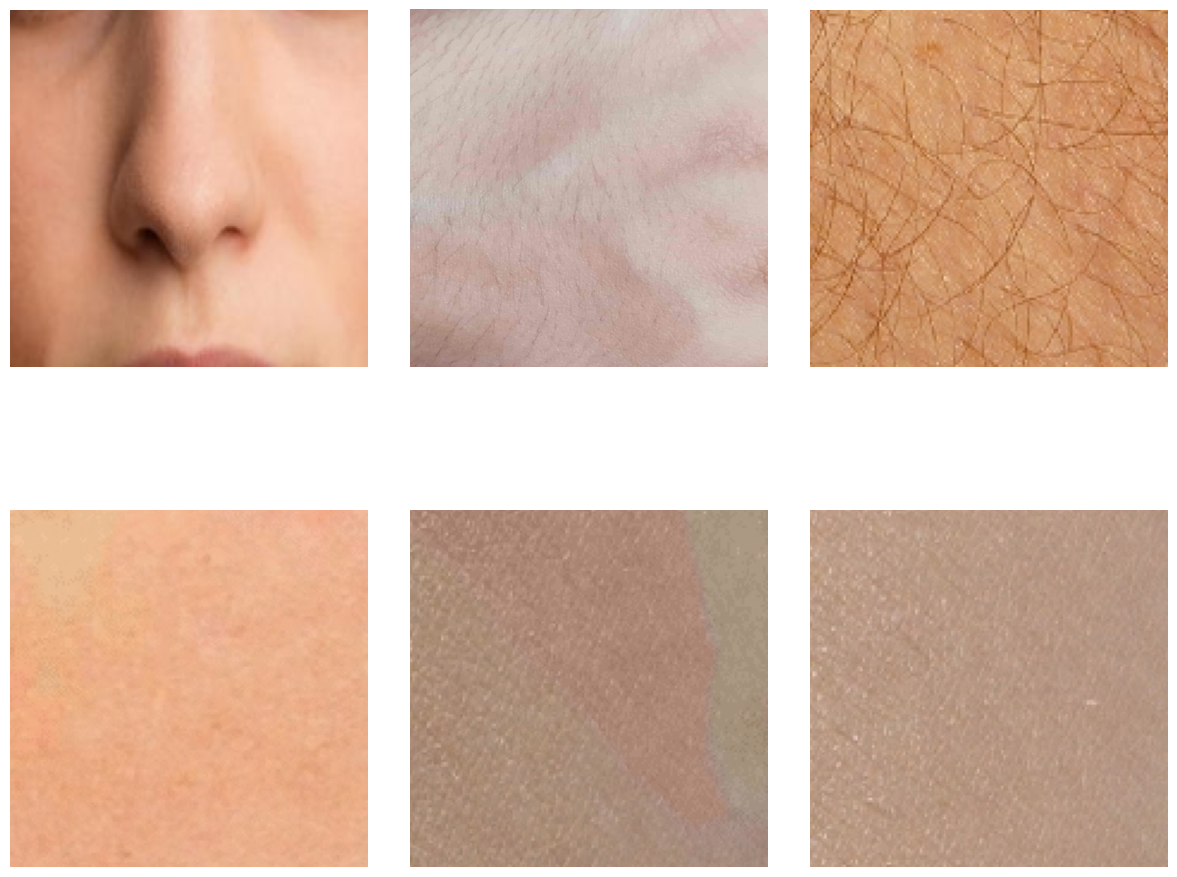

In [25]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
fig.tight_layout(pad=0)

images_indices = [1000, 1050, 1150, 1250, 1333, 1350]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(show_image(*train[images_indices[i]]))
    ax.axis('off')

plt.show()

* Muestra de imágenes de piel con cáncer

Label :piel_cancer(0)
Label :piel_cancer(0)
Label :piel_cancer(0)
Label :piel_cancer(0)
Label :piel_cancer(0)
Label :piel_cancer(0)


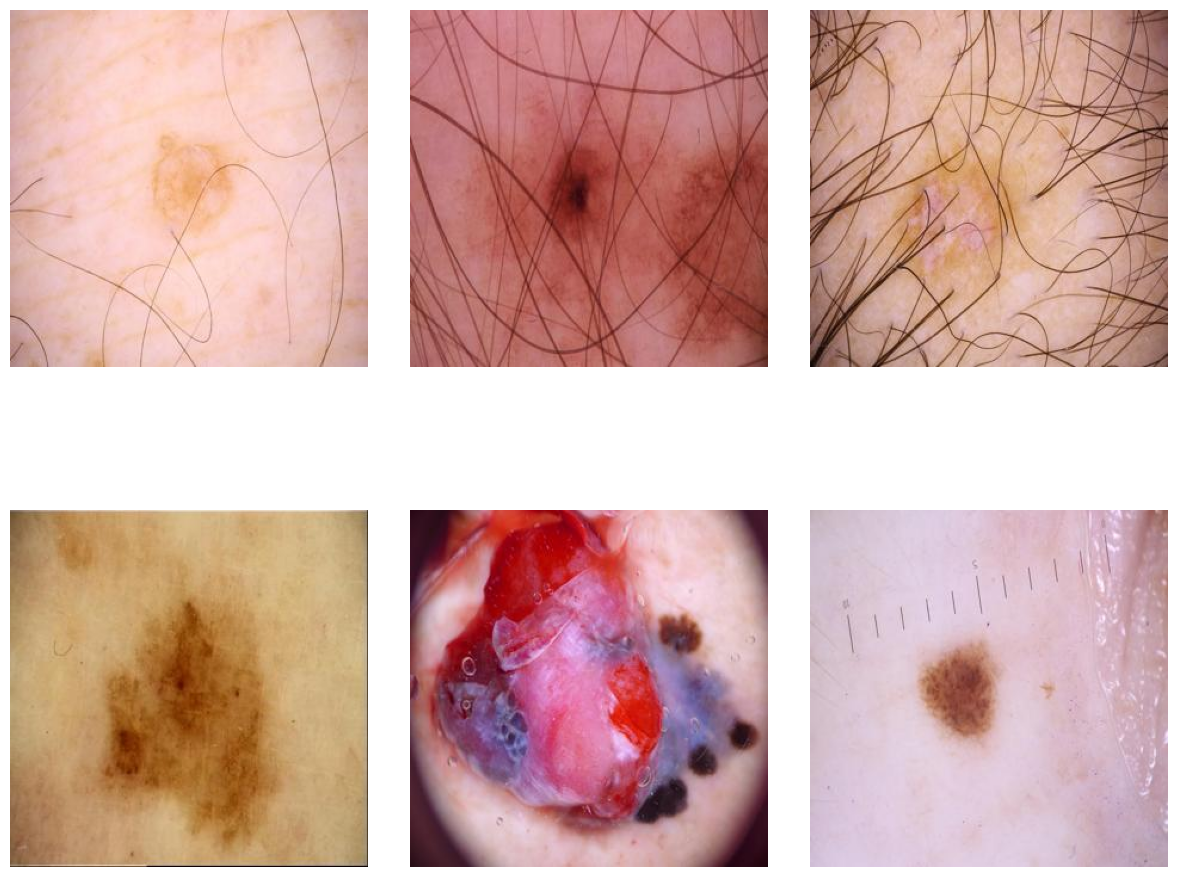

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
fig.tight_layout(pad=0)

images_indices = [1, 100, 200, 300, 400, 500]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(show_image(*train[images_indices[i]]))
    ax.axis('off')

plt.show()

## Preparación y tratamiento de datos

### Trasformación: redimensionado de imágenes

---

En este bloque de código, realizamos el proceso de transformación de nuestros datos aplicando un redimensionado de las imágenes que van a ser utilizadas en nuestros modelos posteriormente.


* Creamos la función `redimensionar_imagen`:

  * Esta función toma como entrada la ruta de una imagen y el nuevo tamaño deseado. Luego, abre la imagen, la redimensiona al nuevo tamaño especificado y la convierte en un array.

* El *tamaño* deseado para todas las imágenes se define como (150, 150).

* Redimensionamiento de las imágenes de entrenamiento: tanto para la clase "piel_sana" como para la clase "piel_cancer" utilizamos la función *redimensionar_imagen*.

* Nos aseguramos que todas las imágenes tengan el mismo tamaño:

  * Realizamos una comprobación con un blucle `for` para asegurarnos de que todas las imágenes tengan el tamaño correcto (150, 150, 3).

* Se concatenan los datos de ambas clases (piel y objeto) en un solo conjunto de datos.

* Creamos las etiquetas correspondientes:
  * Las imágenes de la clase "piel_sana" se etiquetan como 0.
  * Las imágenes de la clase "piel_cancer" se etiquetan como 1.

In [27]:
def redimensionar_imagen(ruta, nuevo_tamano):
    imagen = Image.open(ruta)
    imagen_redimensionada = imagen.resize(nuevo_tamano)
    arreglo_pixeles_redimensionado = np.array(imagen_redimensionada)
    return arreglo_pixeles_redimensionado

# Definir el nuevo tamaño deseado
nuevo_tamano = (150, 150)

# Redimensionar las imágenes de entrenamiento benignas
datos_train_piel_redimensionados = [redimensionar_imagen(os.path.join(train_dir, 'piel_sana', nombre_imagen), nuevo_tamano) for nombre_imagen in os.listdir(os.path.join(train_dir, 'piel_sana'))]

# Redimensionar las imágenes de entrenamiento malignas
datos_train_cancer_redimensionados = [redimensionar_imagen(os.path.join(train_dir, 'piel_cancer', nombre_imagen), nuevo_tamano) for nombre_imagen in os.listdir(os.path.join(train_dir, 'piel_cancer'))]

# Asegurarse de que todas las imágenes tengan el mismo tamaño
datos_train_piel_redimensionados = np.array([img for img in datos_train_piel_redimensionados if img.shape == (150, 150, 3)])
datos_train_cancer_redimensionados = np.array([img for img in datos_train_cancer_redimensionados if img.shape == (150, 150, 3)])

# Concatenar los datos de ambas clases
datos_train_redimensionados = np.concatenate([datos_train_piel_redimensionados, datos_train_cancer_redimensionados], axis=0)

# Crear etiquetas correspondientes
etiquetas_train_redimensionadas = np.concatenate([np.zeros(len(datos_train_piel_redimensionados)), np.ones(len(datos_train_cancer_redimensionados))], axis=0)


* Este proceso es esencial para preparar los datos de las imágenes antes de alimentar a un modelo de ML para su entrenamiento.

* El proceso de redimensionado asegura que todas las imágenes tengan el mismo tamaño, lo que facilita el procesamiento por parte del modelo.

* La creación de etiquetas tambíen es crucial para el entrenamiento supervisado del modelo, ya que le proporciona la información necesaria sobre las clases a predecir.

### Data splitting: Conjunto de entrenamiento y test

---

Este fragmento de código se encarga de preparar los datos  y dividirlos en conjuntos de entrenamiento y test, tambíen realiza una normalización de los píxeles de las imágenes y convierte las etiquetas en formato one-hot encoding.

* **División de los datos en conjuntos de entrenamiento y test**:
  * Se utiliza la función `train_test_split` de *scikit-learn* para dividir los datos de imágenes (datos_train_redimensionados) y etiquetas (etiquetas_train_redimensionadas) en dos conjuntos separados: uno para entrenamiento (`X_train, y_train`) y otro para prueba (`X_test, y_test`).
  * Con el parámetro `test_size=0.2` indicamos que el 20% de los datos se utilizarán para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento.
  * Con el parámetro `random_state=42` aseguramos la reproducibilidad al fijar la semilla aleatoria.
    

* **Normalización de los píxeles:** las intensidades de los píxeles de las imágenes se normalizan dividiendo cada valor de píxel por 255.
  * Este proceso asegura que todas las características estén en una escala similar, lo que puede mejorar la convergencia del modelo durante el entrenamiento. Las imágenes se convierten a tipo de datos float32 antes de la normalización para permitir la división por un número decimal.

* **Conversión de etiquetas a formato one-hot**:
  * Las etiquetas (*y_train / y_test*) se convierten en formato one-hot utilizando la función `to_categorical` de Keras.
  * Esto consiste en  que cada etiqueta se representa como un vector binario donde un único valor es 1 y el resto son 0. Por ejemplo, si hay dos clases (como en este caso), la clase 0 se representará como [1, 0] y la clase 1 como [0, 1].
  * Es útil ya que proporciona una representación más adecuada de las etiquetas para el modelo de aprendizaje automático.

In [29]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_train_redimensionados, etiquetas_train_redimensionadas, test_size=0.2, random_state=42)

# Normalizar los píxeles dividiendo por 255
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir etiquetas a formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

* Vemos la estructura o shape de nuestros conjuntos de datos:
  * `X_train`: 1334 imagenes de 150 x 150 rgb.
  * `y_train_one_hot`: Las etiquetas del conjunto train.
  * `y_test` : solo muestra el numero de imagenes ya que el modelo en su entrenamiento no va a tener contacto con ellas y no tienen que estar en el mismo shape que X_train.
  * `y_test_one_hot`: las etiquetas de y_test para poder contrastar las predicciones del modelo y evaluar su precisión.

In [30]:
print(X_train.shape)
print(y_train_one_hot.shape)
print(y_test.shape)
print(y_test_one_hot.shape)

(1334, 150, 150, 3)
(1334, 2)
(334,)
(334, 2)


## Creación de los Modelos ML

### Modelo 1: Sequential simple

---

* Resumen:
  
```
Número de aciertos: 321
Número de fallos: 13
Accuracy: 0.9610778443113772
```

#### Aumento de Dato
* Debido a que tenemos pocas imágenes de piel sana, ya que no hay a penas datasets de imágenes de piel sana en internet y con la intención de que el dataset estuviese balanceado, hemosamos utiizando la técnica de aumento de datos para aumentar la cantidad y variedad de datos de entrenamiento. Esto nos ayuda a mejorar la capacidad de generalización del modelo y a reducir el riesgo de sobreajuste.

* **ImageDataGenerator**:
  * Utilizamos la clase `ImageDataGenerator` de Keras para aplicar transformaciones de aumento de datos a nuestras imágenes. Esta clase proporciona una serie de parámetros que controlan las transformaciones que se aplicarán a las imágenes durante el entrenamiento.

* **Parámetros de Aumento de Datos**:
  * Especificamos varios parámetros para controlar las transformaciones de aumento de datos:
    * `rotation_range`: Rango de ángulos de rotación en grados.
    * `width_shift_range` y `height_shift_range`: Rangos de cambio horizontal y vertical en fracción de la dimensión total.
    * `shear_range`: Rango de intensidad de cizallamiento en sentido horario en grados.
    * `zoom_range`: Rango de zoom aleatorio.
    * `horizontal_flip`: Booleano que indica si se aplicará volteo horizontal aleatorio.
    * `fill_mode`: Estrategia de relleno para las transformaciones que crean nuevos píxeles.

* **Aplicación del Aumento de Datos**:
  * Una vez que hemos configurado los parámetros del generador de datos, llamamos al método `fit` de `datagen` y pasamos nuestros datos de entrenamiento (`X_train`) como argumento. Esto calcula estadísticas sobre los datos de entrenamiento y configura internamente el generador de datos para aplicar las transformaciones durante el entrenamiento del modelo.

* **Entrenamiento del Modelo con Generadores de Datos**:
  * Después de configurar el generador de datos, creamos nuestro modelo, lo compilamos y mostramos un resumen del mismo.
  * Utilizamos `EarlyStopping` como callback para detener el entrenamiento si la precisión en el conjunto de validación deja de mejorar después de 5 épocas.
  * Finalmente, llamamos al método `fit` del modelo y pasamos nuestro generador de datos como argumento (`datagen.flow(X_train, y_train_one_hot, batch_size=32)`). Esto permite que el modelo se entrene utilizando las imágenes aumentadas generadas por el generador de datos.


In [31]:
# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Crear modelo
model1 = Sequential([
    Conv2D(32, 3, input_shape=(150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compilar el modelo
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar resumen del modelo
model1.summary()

# Añadir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenar el modelo con Early Stopping utilizando generadores de datos
history1 = model1.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=32),
    validation_data=(X_test, y_test_one_hot),
    epochs=30,
    callbacks=[early_stopping]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 128)               2

### Evaluación de las Predicciones del Modelo 1

---

Hemos utilizado el modelo Sequential `model1` para hacer predicciones sobre el conjunto de datos de prueba (`X_test`) y luego evaluamos las predicciones comparándolas con las etiquetas reales (`y_test`).

* **Hacer predicciones con el modelo**:
  * Utilizamos el método `predict()` del modelo `model1` para hacer predicciones sobre el conjunto de datos de prueba (`X_test`). Esto genera un array de predicciones (`y_pred`) que contiene las probabilidades previstas para cada clase.

* **Obtener las clases predichas**:
  * Para cada predicción en `y_pred`, determinamos la clase predicha seleccionando el índice de la clase con la probabilidad más alta utilizando `np.argmax()`. Esto nos da un array de etiquetas predichas (`predicted_labels`).

* **Calcular el número de aciertos y fallos**:
  * Comparamos las etiquetas predichas (`predicted_labels`) con las etiquetas reales (`y_test`) para contar el número de predicciones correctas e incorrectas. Esto se hace mediante la comparación de arrays y sumando el número de coincidencias.

* **Calcular la precisión**:
  * La precisión se calcula dividiendo el número de predicciones correctas por el número total de predicciones realizadas. Esto nos da una medida de la exactitud del modelo en predecir las etiquetas correctas.

* **Imprimir resultados**:
  * Imprimimos el número de aciertos, el número de fallos y la precisión del modelo en la consola para su análisis y evaluación.

In [33]:
# EVALUACION DE MODELO 1

# Hacer predicciones con el modelo
y_pred = model1.predict(X_test)

# Obtener las clases predichas (índice de la clase con probabilidad más alta)
predicted_labels = np.argmax(y_pred, axis=1)

# Calcular el número de aciertos y fallos
correct_predictions = np.sum(predicted_labels == y_test)
incorrect_predictions = len(y_test) - correct_predictions

# Calcular la precisión
accuracy = correct_predictions / len(y_test)

# Imprimir resultados
print(f'Número de aciertos: {correct_predictions}')
print(f'Número de fallos: {incorrect_predictions}')
print(f'Accuracy: {accuracy}')

11/11 [==============================] - 0s 28ms/step
Número de aciertos: 321
Número de fallos: 13
Accuracy: 0.9610778443113772


### Modelo 2: Sequential_1 simple

---

* Resumen:
```
Número de aciertos: 319
Número de fallos: 15
Accuracy: 0.9550898203592815
```

#### Aumento de Datos

En esta ocasión volvemos a utilizar la técnica de aumento de datos para aumentar la cantidad y variedad de datos de entrenamiento. Esto nos ayuda a mejorar la capacidad de generalización del modelo y a reducir el riesgo de sobreajuste.

* **ImageDataGenerator**:
  * Utilizamos la clase `ImageDataGenerator` de Keras para aplicar transformaciones de aumento de datos a nuestras imágenes. Esta clase proporciona una serie de parámetros que controlan las transformaciones que se aplicarán a las imágenes durante el entrenamiento.

* **Parámetros de Aumento de Datos**:
  * Especificamos varios parámetros para controlar las transformaciones de aumento de datos:
    * `rotation_range`: Ampliamos el rango de ángulos de rotación a 40 grados para una mayor variabilidad.
    * `width_shift_range` y `height_shift_range`: Rangos de cambio horizontal y vertical en fracción de la dimensión total.
    * `shear_range`: Rango de intensidad de cizallamiento en sentido horario en grados.
    * `zoom_range`: Rango de zoom aleatorio.
    * `horizontal_flip`: Booleano que indica si se aplicará volteo horizontal aleatorio.
    * `vertical_flip`: Booleano que indica si se aplicará volteo vertical aleatorio.
    * `fill_mode`: Estrategia de relleno para las transformaciones que crean nuevos píxeles.

* **Aplicación del Aumento de Datos**:
  * Una vez que hemos configurado los parámetros del generador de datos, llamamos al método `fit` de `datagen` y pasamos nuestros datos de entrenamiento (`X_train`) como argumento. Esto calcula estadísticas sobre los datos de entrenamiento y configura internamente el generador de datos para aplicar las transformaciones durante el entrenamiento del modelo.

* **Entrenamiento del Modelo con Generadores de Datos**:
  * Después de configurar el generador de datos, creamos nuestro modelo, lo compilamos y mostramos un resumen del mismo.
  * Utilizamos `EarlyStopping` como callback para detener el entrenamiento si la precisión en el conjunto de validación deja de mejorar después de 5 épocas.
  * Finalmente, llamamos al método `fit` del modelo y pasamos nuestro generador de datos como argumento (`datagen.flow(X_train, y_train_one_hot, batch_size=32)`). Esto permite que el modelo se entrene utilizando las imágenes aumentadas generadas por el generador de datos.


In [34]:
# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=40,           # Rango de rotación más amplio
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,          # Agregar volteo vertical
    fill_mode='nearest'
)

datagen.fit(X_train)

# Crear modelo
model2 = Sequential([
    Conv2D(32, 3, input_shape=(150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compilar el modelo
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar resumen del modelo
model2.summary()

# Añadir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenar el modelo con Early Stopping utilizando generadores de datos
history2 = model2.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=32),
    validation_data=(X_test, y_test_one_hot),
    epochs=30,
    callbacks=[early_stopping]
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [35]:
# EVALUACION DE MODELO 2

# Hacer predicciones con el modelo
y_pred = model2.predict(X_test)

# Obtener las clases predichas (índice de la clase con probabilidad más alta)
predicted_labels = np.argmax(y_pred, axis=1)

# Calcular el número de aciertos y fallos
correct_predictions = np.sum(predicted_labels == y_test)
incorrect_predictions = len(y_test) - correct_predictions

# Calcular la precisión
accuracy = correct_predictions / len(y_test)

# Imprimir resultados
print(f'Número de aciertos: {correct_predictions}')
print(f'Número de fallos: {incorrect_predictions}')
print(f'Accuracy: {accuracy}')

11/11 [==============================] - 0s 20ms/step
Número de aciertos: 319
Número de fallos: 15
Accuracy: 0.9550898203592815


### Modelo 3: MobileNetV2

---

* Resumen:
```
Número de aciertos: 1904
Número de fallos: 8
Accuracy: 0.99581589958159
```
#### Adaptación de Modelo Pre-Entrenado con MobileNetV2



En este fragmento de código, estamos adaptando un modelo pre-entrenado MobileNetV2 para la clasificación de imágenes en nuestro conjunto de datos específico. MobileNetV2 es una red neuronal convolucional (CNN) que ha sido pre-entrenada en el conjunto de datos de ImageNet y es conocida por su eficiencia computacional y su capacidad para mantener un alto rendimiento en tareas de clasificación de imágenes.

* **Base del Modelo**:
  * Utilizamos `MobileNetV2` como base del modelo. Al establecer `include_top=False`, hemos omitido la capa densa de salida de ImageNet y hemos especificado el tamaño de entrada de las imágenes como (150, 150, 3).
  * Hemos especificado `pooling='max'` para utilizar la capa de agrupación máxima al final del modelo, lo que reduce la dimensionalidad de las características extraídas.

* **Capas Entrenables**:
  * Marcamos las últimas 10 capas del modelo base como entrenables. Esto nos permite adaptar estas capas a nuestro conjunto de datos durante el entrenamiento.

* **Aumento de Datos**:
  * Utilizamos `ImageDataGenerator` para aplicar transformaciones de aumento de datos a nuestras imágenes, lo que aumenta la cantidad y la variedad de los datos de entrenamiento.
  * Se especifican varios parámetros para controlar las transformaciones de aumento de datos, como rotación, desplazamiento, cizallamiento, zoom y volteo horizontal y vertical.

* **Crear el Modelo**:
  * Construimos nuestro modelo agregando capas adicionales encima del modelo base MobileNetV2. Estas capas incluyen una capa densa con 512 unidades y activación ReLU, seguida de normalización de lotes y dropout. Luego, añadimos otra capa densa con 256 unidades, normalización de lotes y dropout. La última capa densa tiene 2 neuronas de salida y utiliza una activación softmax para la clasificación de dos clases.

* **Compilar el Modelo**:
  * Compilamos el modelo utilizando el optimizador Adam con una tasa de aprendizaje de 0.0001, la función de pérdida `categorical_crossentropy` y la métrica de `accuracy`.

* **Mostrar Resumen del Modelo**:
  * Utilizamos el método `summary` para mostrar un resumen del modelo, que incluye información sobre la arquitectura de la red y el número de parámetros entrenables.

* **Añadir Early Stopping**:
  * Añadimos Early Stopping como un callback para detener el entrenamiento si la precisión en el conjunto de validación deja de mejorar después de 5 épocas.
  
* **Entrenar el Modelo**:
  * Entrenamos el modelo utilizando generadores de datos tanto para los datos de entrenamiento como para los de validación. Especificamos un tamaño de lote de 32 y entrenamos durante 30 épocas, con Early Stopping como callback.


In [38]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3), pooling='max')

for layer in base_model.layers[-10:]:
    layer.trainable = True



# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=40,           # Rango de rotación más amplio
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,          # Agregar volteo vertical
    fill_mode='nearest'
)

datagen.fit(X_train)

# Crear modelo
model3 = Sequential([
    base_model,
    Dense(512, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 8 clases en tu caso
])


# Compilar el modelo
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar resumen del modelo
model3.summary()

# Añadir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenar el modelo con Early Stopping utilizando generadores de datos
history3 = model3.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=32),
    validation_data=(X_test, y_test_one_hot),
    epochs=30,
    callbacks=[early_stopping]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_10 (Dense)            (None, 512)               655872    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_7 (Batc  (None, 256)             

In [39]:
# EVALUACION DE MODELO 3

# Hacer predicciones con el modelo
y_pred = model3.predict(X_test)

# Obtener las clases predichas (índice de la clase con probabilidad más alta)
predicted_labels = np.argmax(y_pred, axis=1)

# Calcular el número de aciertos y fallos
correct_predictions = np.sum(predicted_labels == y_test)
incorrect_predictions = len(y_test) - correct_predictions

# Calcular la precisión
accuracy = correct_predictions / len(y_test)

# Imprimir resultados
print(f'Número de aciertos: {correct_predictions}')
print(f'Número de fallos: {incorrect_predictions}')
print(f'Accuracy: {accuracy}')

11/11 [==============================] - 1s 40ms/step
Número de aciertos: 325
Número de fallos: 9
Accuracy: 0.9730538922155688


### Resumen de resultados de los modelos

  * Una vez que hemos entrenado los 3 modelos estos han sido los resultados:

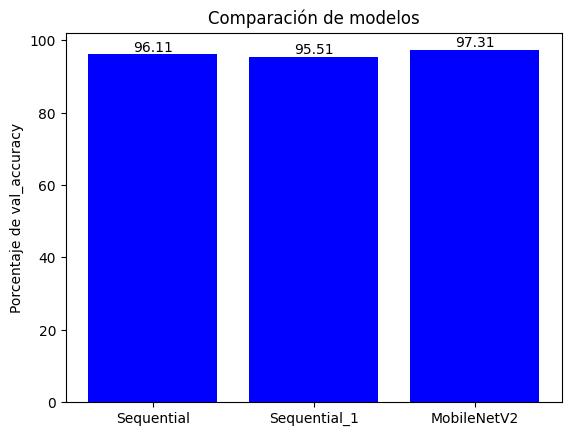

In [40]:
Sequential=0.9610778443113772
Sequential_1=0.9550898203592815
MobileNetV2=0.9730538922155688

# Multiplicar por 100
Sequential *= 100
Sequential_1 *= 100
MobileNetV2 *= 100

# Nombres de los modelos
model_names = ['Sequential', 'Sequential_1', 'MobileNetV2']

# Valores multiplicados por 100
model_values = [Sequential, Sequential_1, MobileNetV2]

# Crear la gráfica de barras
fig, ax = plt.subplots()
bars = ax.bar(model_names, model_values, color='blue')
plt.ylabel('Porcentaje de val_accuracy')
plt.title('Comparación de modelos')

# Agregar los valores encima de las columnas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Como podemos ver el mejor resultado ha sido el `MobileNetV2 con 97.31%` de val_accuracy.

### Accuracy & Loss del mejor modelo

Figure(1200x400)


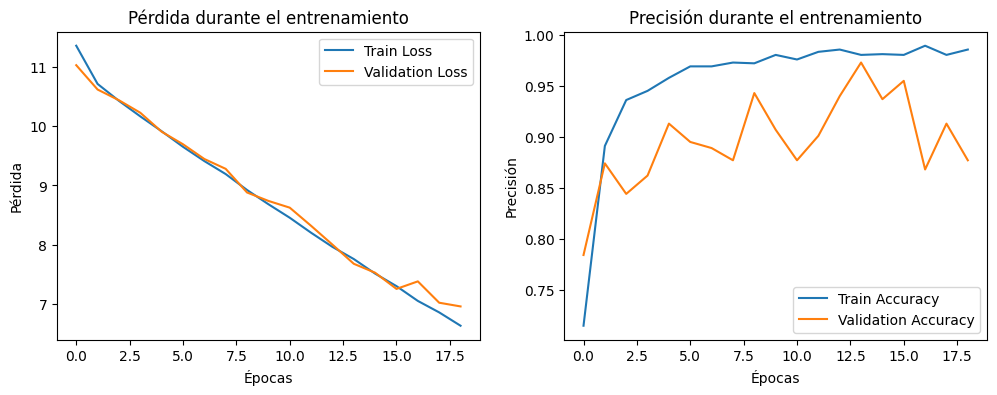

In [42]:
# Visualizar gráficos de pérdida y precisión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de pérdida
ax1.plot(history3.history['loss'], label='Train Loss')
ax1.plot(history3.history['val_loss'], label='Validation Loss')
ax1.set_title('Pérdida durante el entrenamiento')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Gráfico de precisión
ax2.plot(history3.history['accuracy'], label='Train Accuracy')
ax2.plot(history3.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Precisión durante el entrenamiento')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precisión')
ax2.legend()

print(fig)

### Conversión y Guardado del mejor Modelo en TFLite

---
Exportamos el modelo a drive en un formato .tflite ya que este formato pesa menos, puesto que a la hora de subirlo al github solo se pueden subir archivos que pesen menos de 100MB

Hemos convertido el modelo Keras `model3` en un modelo compatible con TensorFlow Lite (TFLite) utilizando `tf.lite.TFLiteConverter.from_keras_model()`. Esto convierte el modelo Keras en un formato que puede ser utilizado por dispositivos con recursos limitados, como dispositivos móviles o sistemas integrados.

* **Convertir el modelo a TFLite**:
  * Utilizamos `from_keras_model()` del objeto `TFLiteConverter` para convertir el modelo Keras `model3` en un modelo compatible con TFLite. Esto encapsula el modelo y lo prepara para ser ejecutado en dispositivos con recursos limitados.

* **Guardar el modelo TFLite en un archivo**:
  * Después de la conversión, guardamos el modelo TFLite en un archivo utilizando un objeto de archivo en modo de escritura binaria (`'wb'`). Esto nos permite almacenar el modelo en el sistema de archivos local o en la nube para su posterior uso.

* **Ruta de Guardado**:
  * El modelo TFLite se guarda en la ruta especificada `'C:/Users/admin2/Desktop/dermascan_colabs/modelos/sana_vs_cancer_mejorado.tflite'`.

In [44]:
# Convertir el modelo en un modelo compatible con TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model3)
tflite_model = converter.convert()

# Guardar el modelo TFLite en un archivo
with open('C:/Users/admin2/Desktop/dermascan_colabs/modelos/sana_vs_cancer_mejorado.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\admin2\AppData\Local\Temp\tmpoe87e5kf\assets


INFO:tensorflow:Assets written to: C:\Users\admin2\AppData\Local\Temp\tmpoe87e5kf\assets


### Evaluación del mejor Modelo

#### Resumen del Mejor Modelo

---

* Durante la evaluación del mejor modelo, se realizaron las siguientes observaciones:

  - **Número de Aciertos**: `El modelo logró clasificar correctamente 325 imágenes`.

  - **Número de Fallos**: `Se produjeron solamente 9 fallos en la clasificación de imágenes`.

  - **Accuracy**: `La precisión del modelo, calculada como la proporción de predicciones correctas sobre el total de predicciones, fue del 97.31 %`.

In [47]:
# Hacer predicciones con el modelo
y_pred = model3.predict(X_test)

# Obtener las clases predichas (índice de la clase con probabilidad más alta)

predicted_labels = np.argmax(y_pred, axis=1)

# Convertir las predicciones a etiquetas de clases (índices)
y_pred2 = y_pred.argmax(axis=1)

# Calcular el número de aciertos y fallos
correct_predictions = np.sum(predicted_labels == y_test)
incorrect_predictions = len(y_test) - correct_predictions

# Calcular la precisión
accuracy = correct_predictions / len(y_test)

# Imprimir resultados
print(f'Número de aciertos: {correct_predictions}')
print(f'Número de fallos: {incorrect_predictions}')
print(f'Accuracy: {accuracy}')

# Calcular métricas
y_test_classes = y_test.flatten()

# Calcular métricas
roc_auc = roc_auc_score(y_test_classes, predicted_labels)
conf_matrix = confusion_matrix(y_test_classes, predicted_labels)
class_report = classification_report(y_test_classes, predicted_labels)

# Imprimir métricas
print(f'AUC-ROC: {roc_auc:.2f}')
print('')
print('Confusion Matrix:')
print(conf_matrix)
print('')
print('Classification Report:')
print(class_report)

11/11 [==============================] - 0s 31ms/step
Número de aciertos: 325
Número de fallos: 9
Accuracy: 0.9730538922155688
AUC-ROC: 0.97

Confusion Matrix:
[[175   0]
 [  9 150]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       175
         1.0       1.00      0.94      0.97       159

    accuracy                           0.97       334
   macro avg       0.98      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334



* Los resultados muestran que el modelo tiene un rendimiento muy alto y es capaz de realizar predicciones con una precisión muy alta en este conjunto de datos.

    - **Número de Aciertos**: El modelo clasificó correctamente 325 imágenes.
    
    
- **Número de Fallos**: Solo se produjeron 9 fallos en la clasificación de imágenes.    

- **Accuracy**: La precisión del modelo, calculada como la proporción de predicciones correctas sobre el total de predicciones, fue del 97.31%. Esto indica que el modelo es altamente preciso en sus predicciones.

- **AUC-ROC**: El AUC-ROC (Area Under the Receiver Operating Characteristic Curve) mide la capacidad del modelo para distinguir entre las clases positiva y negativa. Un valor de 1.00 indica un rendimiento perfecto del modelo en esta métrica, lo que sugiere que el modelo tiene una excelente capacidad para discriminar entre las clases.

- **Confusion Matrix**: La matriz de confusión muestra las predicciones del modelo en comparación con las clases reales. En este caso, la mayoría de las predicciones coincidieron con las clases reales, con solo 9 errores en total.

- **Classification Report**: El informe de clasificación proporciona métricas detalladas como precisión, recall, y f1-score para cada clase, así como la precisión promedio ponderada y otras métricas agregadas. En este caso, todas las métricas son cercanas a 1.00, lo que indica un rendimiento excepcionalmente bueno del modelo en ambos conjuntos de datos.

### Muestra de predicción de imágenes

---

In [49]:
validation_dat=(X_test, y_test_one_hot)
images_batch, labels_batch = validation_dat

len(images_batch)

334

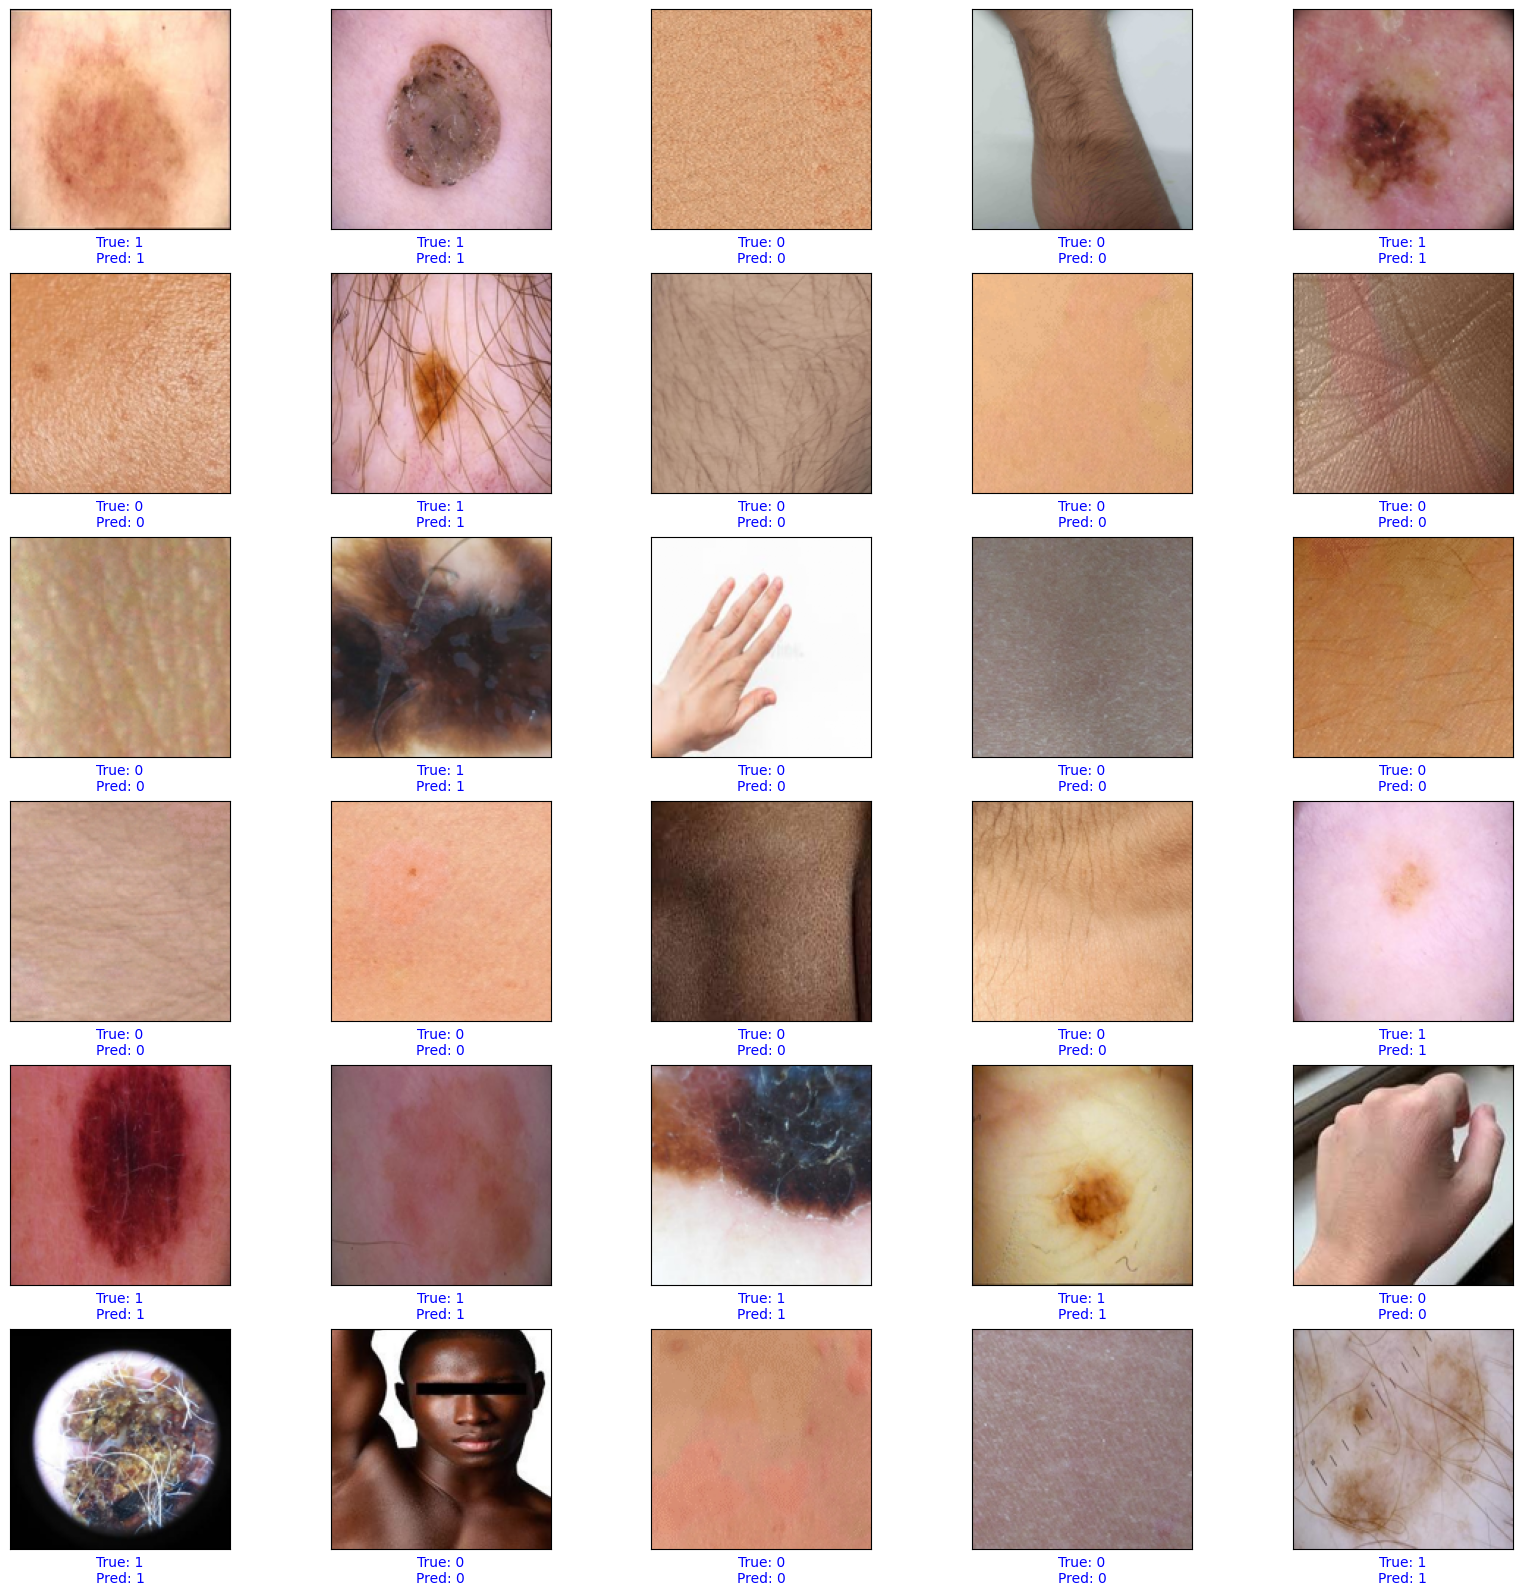

In [50]:
# Muestra los primeros 30 imágenes con la categoría real y el valor que predice el modelo
plt.figure(figsize=(20, 20))
for i in range(30):
    plt.subplot(6, 5, i + 1)  # Ajusta el número de filas y columnas según sea necesario
    cmap_image = "binary" if predicted_labels[i] == y_pred2[i] else "Oranges"
    plt.imshow(images_batch[i], cmap=cmap_image)
    plt.xticks([])
    plt.yticks([])
    c = "blue" if predicted_labels[i] == y_pred2[i] else "red"
    plt.xlabel(f"True: {predicted_labels[i]}\nPred: {y_pred2[i]}", color=c)


plt.show()

### Predicciones erróneas

--- 

* Mostraremos los fallos que ha tenido el modelo

In [51]:
y_diff = np.equal(predicted_labels, y_pred2)
y_diff[y_diff==False].size
indices = np.where(y_diff == False)
indices = indices[0]

11/11 [==============================] - 1s 76ms/step


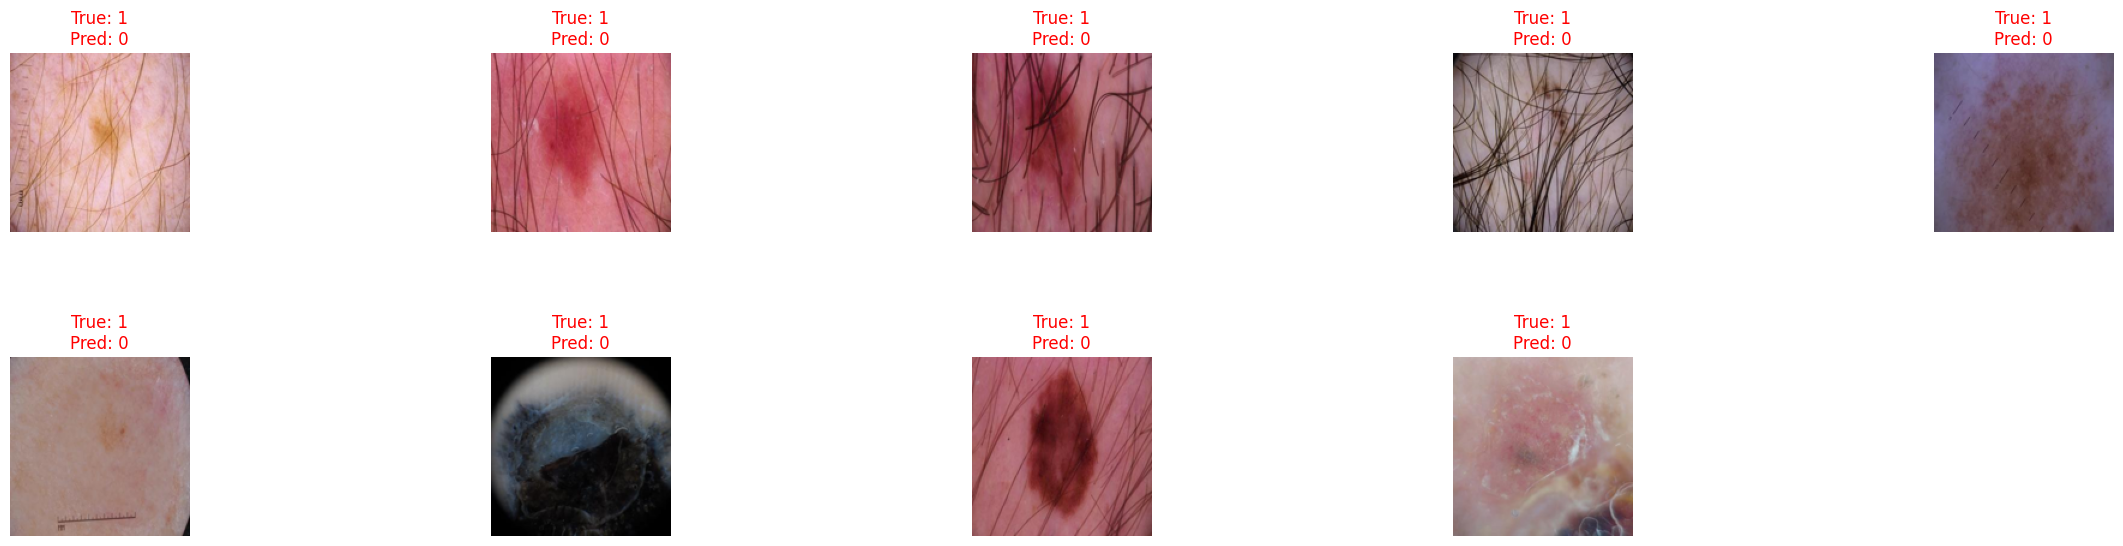

In [54]:
predictions = model3.predict(validation_dat[0])  # Predice utilizando solo las imágenes de validación
y_true = validation_dat[1].argmax(axis=1)  # Obtén las etiquetas verdaderas desde los datos de validación

y_pred = predictions.argmax(axis=1)
indices_mal_clasificadas = np.where(y_true != y_pred)[0]

total_imagenes = len(indices_mal_clasificadas)
filas = 8
columnas = 5

# Establecer el número máximo de imágenes a mostrar (30 o el total de imágenes mal clasificadas, el que sea menor)
max_imagenes_mostrar = min(30, total_imagenes)

plt.figure(figsize=(30, 30))
for i in range(max_imagenes_mostrar):
    imagen_mal_clasificada = validation_dat[0][indices_mal_clasificadas[i]]  # Accede a las imágenes mal clasificadas desde los datos de validación

    plt.subplot(filas, columnas, i + 1)  # Ajusta el número de filas y columnas según sea necesario
    plt.imshow(imagen_mal_clasificada, cmap="Oranges")
    plt.title(f"True: {y_true[indices_mal_clasificadas[i]]}\nPred: {y_pred[indices_mal_clasificadas[i]]}", color="red")
    plt.axis('off')

plt.subplots_adjust(hspace=0.7)
plt.show()

## Prueba de predicción

### Importamos el modelo

* Extraemos nuestro modelo entrenado

In [55]:
# Ruta al archivo .tflite
ruta_archivo = 'C:/Users/admin2/Desktop/dermascan_colabs/modelos/sana_vs_cancer_mejorado.tflite'

# Carga el modelo
modelo3 = tf.lite.Interpreter(model_path=ruta_archivo)
modelo3.allocate_tensors()

### Prueba con imagen sana

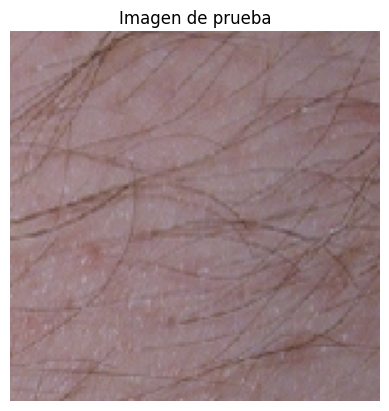

Probabilidad de clase piel_sana: 0.9964992
Probabilidad de clase piel_cancer: 0.0035007892
La imagen es piel sana al 99.65%


In [59]:
# Cargar una imagen de prueba y redimensionarla al tamaño adecuado
imagen_prueba_path = 'C:/Users/admin2/Desktop/dermascan_colabs/imagenes_prueba/piel_sana1.jpg'
imagen_prueba = Image.open(imagen_prueba_path)
imagen_prueba = imagen_prueba.resize((150, 150))  # Redimensionar la imagen al tamaño adecuado

# Mostrar la imagen
plt.imshow(imagen_prueba)
plt.title('Imagen de prueba')
plt.axis('off')  # Desactivar los ejes
plt.show()

# Convertir la imagen a un array numpy y normalizar los valores de píxeles entre 0 y 1
imagen_array = np.array(imagen_prueba, dtype=np.float32) / 255.0

# Agregar una dimensión de lote
imagen_array = np.expand_dims(imagen_array, axis=0)

# Establecer los datos de entrada
input_details = modelo3.get_input_details()
modelo3.set_tensor(input_details[0]['index'], imagen_array)

# Realizar la predicción
modelo3.invoke()

# Obtener el resultado de la predicción
prediccion = modelo3.get_tensor(modelo3.get_output_details()[0]['index'])

# Imprimir la predicción
print("Probabilidad de clase piel_sana:", prediccion[0, 0])
print("Probabilidad de clase piel_cancer:", prediccion[0, 1])

# Clasificación final basada en la probabilidad más alta
clase_predicha = np.argmax(prediccion)
if clase_predicha == 0:
    print(f"La imagen es piel sana al {round(prediccion[0, 0] * 100, 2)}%")
else:
    print(f"La imagen es piel con lesión cancerosa al {round(prediccion[0, 1] * 100, 2)}%")

### Prueba con imagen de lesión cancerosa

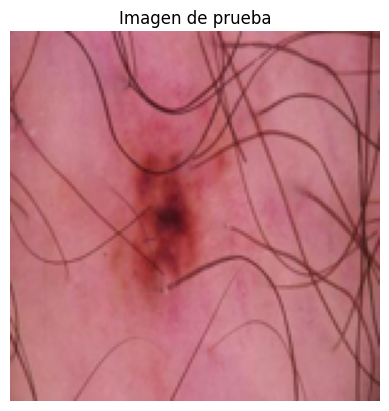

Probabilidad de clase piel_sana: 0.013673358
Probabilidad de clase piel_cancer: 0.9863266
La imagen es piel con lesión cancerosa al 98.63%


In [60]:
# Cargar una imagen de prueba y redimensionarla al tamaño adecuado
imagen_prueba_path = 'C:/Users/admin2/Desktop/dermascan_colabs/imagenes_prueba/piel_cancer1.jpg'
imagen_prueba = Image.open(imagen_prueba_path)
imagen_prueba = imagen_prueba.resize((150, 150))  # Redimensionar la imagen al tamaño adecuado

# Mostrar la imagen
plt.imshow(imagen_prueba)
plt.title('Imagen de prueba')
plt.axis('off')  # Desactivar los ejes
plt.show()

# Convertir la imagen a un array numpy y normalizar los valores de píxeles entre 0 y 1
imagen_array = np.array(imagen_prueba, dtype=np.float32) / 255.0

# Agregar una dimensión de lote
imagen_array = np.expand_dims(imagen_array, axis=0)

# Establecer los datos de entrada
input_details = modelo3.get_input_details()
modelo3.set_tensor(input_details[0]['index'], imagen_array)

# Realizar la predicción
modelo3.invoke()

# Obtener el resultado de la predicción
prediccion = modelo3.get_tensor(modelo3.get_output_details()[0]['index'])

# Imprimir la predicción
print("Probabilidad de clase piel_sana:", prediccion[0, 0])
print("Probabilidad de clase piel_cancer:", prediccion[0, 1])

# Clasificación final basada en la probabilidad más alta
clase_predicha = np.argmax(prediccion)
if clase_predicha == 0:
    print(f"La imagen es piel sana al {round(prediccion[0, 0] * 100, 2)}%")
else:
    print(f"La imagen es piel con lesión cancerosa al {round(prediccion[0, 1] * 100, 2)}%")

## Conclusión

---

* Hemos alcanzando un 97.31% de precisión de nuestro modelo en la clasificacion de imagenes en las categorias  piel_sana y piel_cancer.

* Este alto porcentaje de acierto nos asegura que muestro modelo es fiable casi al 100% en el segundo nivel de clasificación de nuestra aplicación que es el poder diferenciar una imagen de piel sana de una imagen de piel con algún tipo de lesión cancerosa.